<h1>Page Rank and Personalized Page Rank</h1>

In [19]:
library('igraph')
library('Matrix')
library('pracma')

In [20]:
create_transition_matrix = function (g){

    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  
    z = matrix(rowSums(adj))
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    return(transition_matrix)
}

In [21]:
random_walk = function (args){
           
    v = args$start_node
    pg_rank_vec <- args$page_rank_vector
    
    for(i in 1:args$num_steps){

        PMF = args$transition_matrix[v, ]

        v <- sample(1 : vcount(args$g), 1, prob = (1-args$teleport_prob) * PMF + args$teleport_prob * args$teleport_pmf)
        
        if(!args$steady_state)
                pg_rank_vec[v] <- pg_rank_vec[v] + 1     
        
    }
    
    if(args$steady_state)
        pg_rank_vec[v] <- pg_rank_vec[v] + 1
    
    return(pg_rank_vec)
}

In [28]:
my_page_rank = function(args){
    
    for(i in 1:args$iters){
    args$start_node <- sample(1:n, 1)
    args$page_rank_vector <- random_walk(args)
}

    pdf <- args$page_rank_vector / sum(args$page_rank_vector)

    plot(c(pdf), xlab = "Vertex Number", ylab = "Probability of vertex in a random walk", main = args$plot_title)
    #Answers "What is the probability of a randomly chosen vertex in a random walk is Vertex X?"
    #Many random walks have vertices traversed as 1,1,1,2,2,3 -> P(1) = 3/6, P(2) = 2/6, P(3) = 1/6
    
    
    random_walk_prob <- c(args$page_rank_vector/args$iters)

    plot(args$in_degree, random_walk_prob, xlab = "In degree ", ylab = "Random Walk Probability")
    return(pdf)
    
}

<h2>3a</h2>

Connected:  TRUE


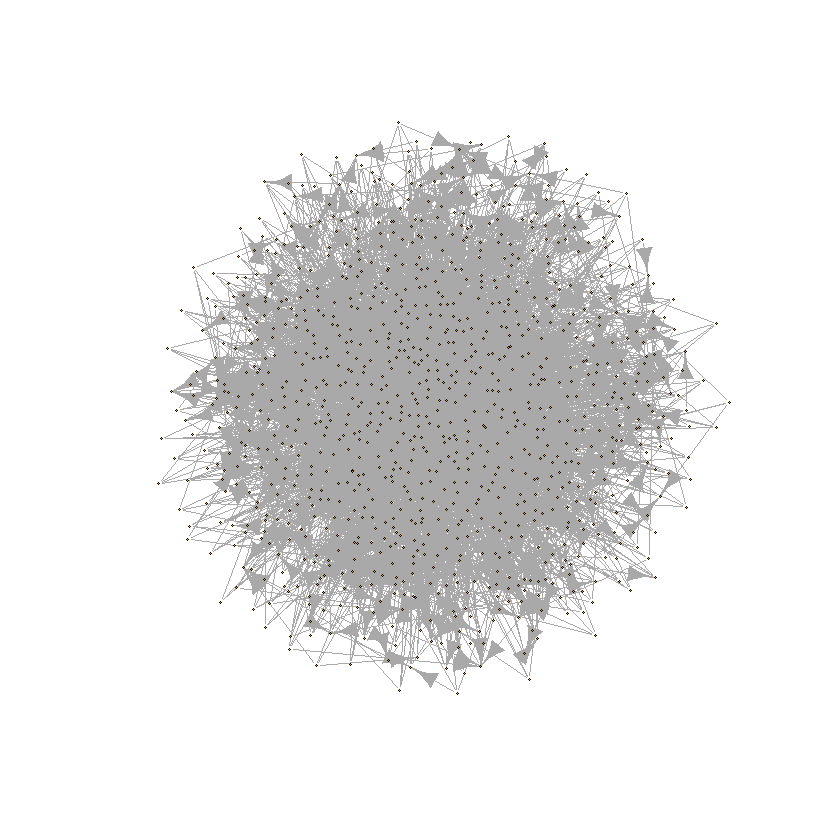

In [23]:
n = 1000
graph <- barabasi.game(n = n, m = 4, directed = TRUE)
writeLines(paste("Connected: ", is.connected(graph)))
plot(graph, vertex.size=1, vertex.label=NA)

   [1] 0 1 2 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [38] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [75] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [112] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [149] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [186] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [223] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [260] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [297] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [334] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [371] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [408] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [445] 4 4 4 4 4 4 4 4 4 4 4

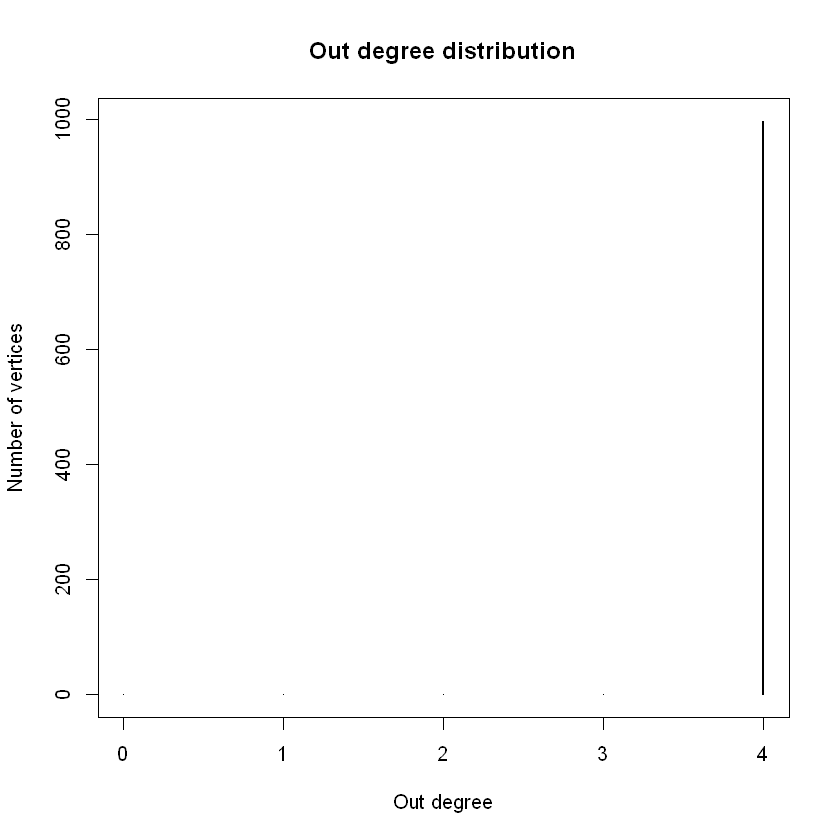

In [24]:
out_degrees <- degree(graph, v = V(graph), mode = c("out"))
print(out_degrees)
plot(table(out_degrees), xlab = "Out degree", ylab = "Number of vertices", main = "Out degree distribution")

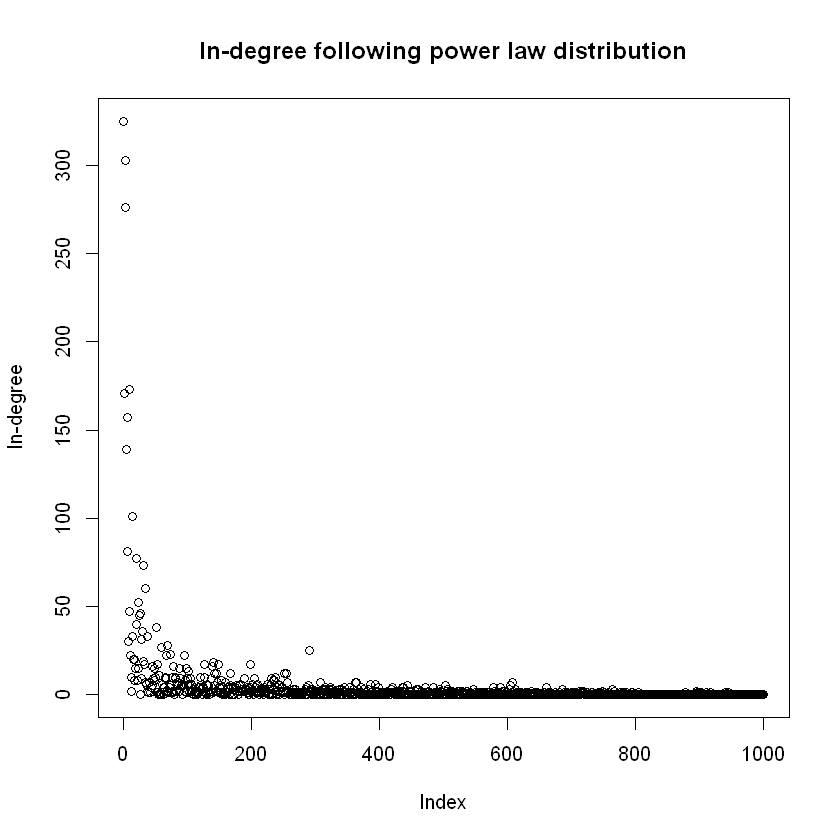

In [25]:
in_degree <- degree(graph, v = V(graph), mode = c("in"))
plot(in_degree, main = "In-degree following power law distribution", ylab = "In-degree")

In [29]:
transition_matrix <- create_transition_matrix(graph)

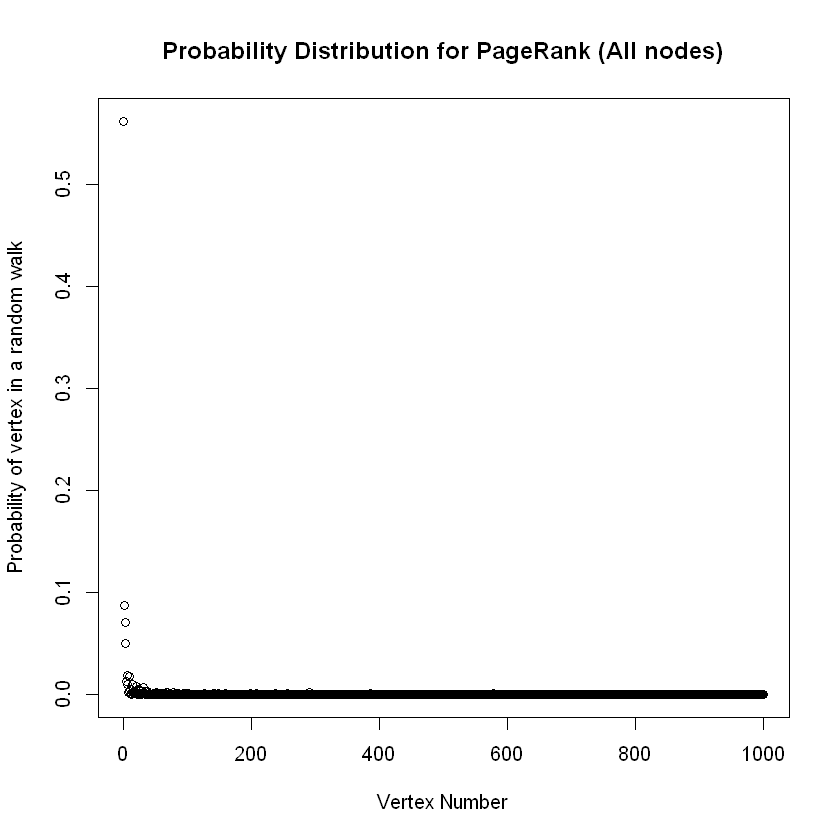

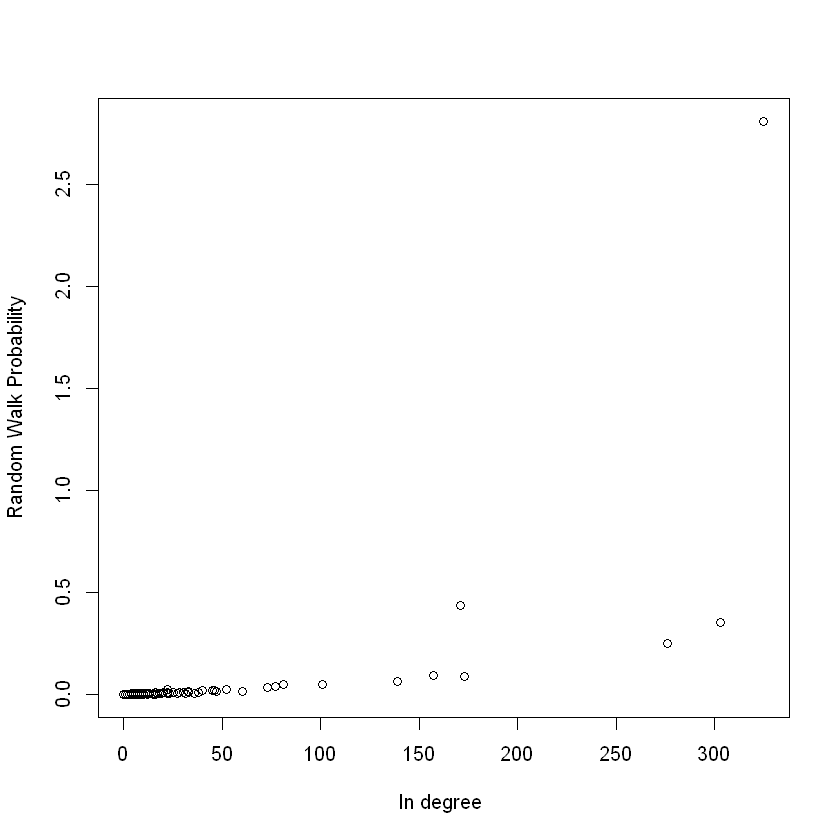

In [30]:
pagerank_scores <- rep(0, n)
iterations <- 1000

args <- list(g = graph, num_steps = 5, steady_state = FALSE, teleport_prob = 0, iters = iterations,
             in_degree = in_degree, teleport_pmf = rep(0, n), page_rank_vector = pagerank_scores, 
             transition_matrix = transition_matrix, plot_title = "Probability Distribution for PageRank (All nodes)")

page_rank_scores <- my_page_rank(args)

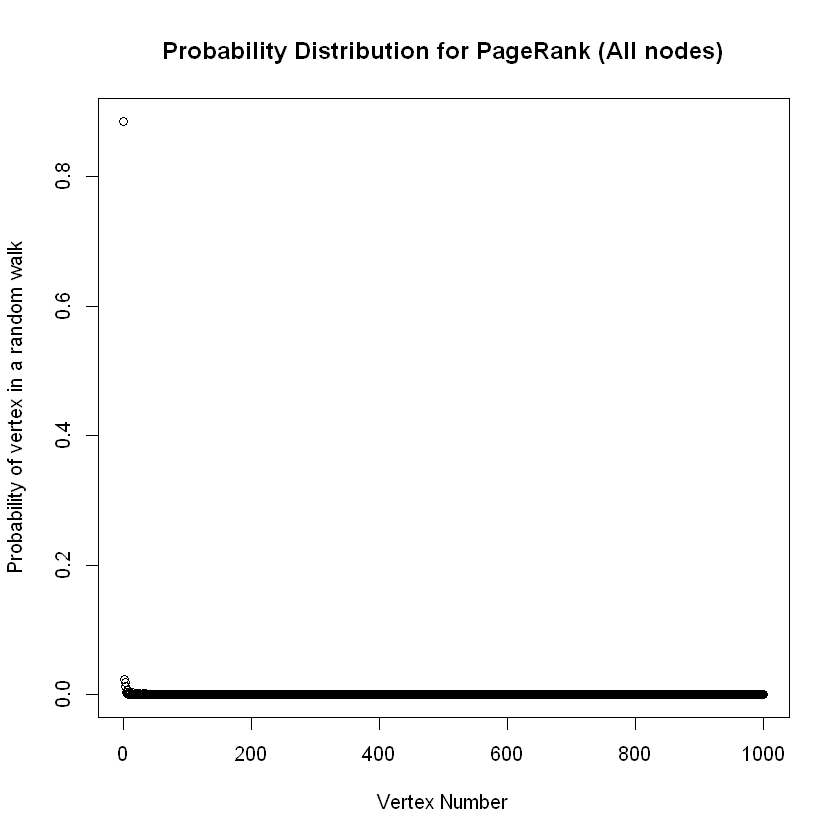

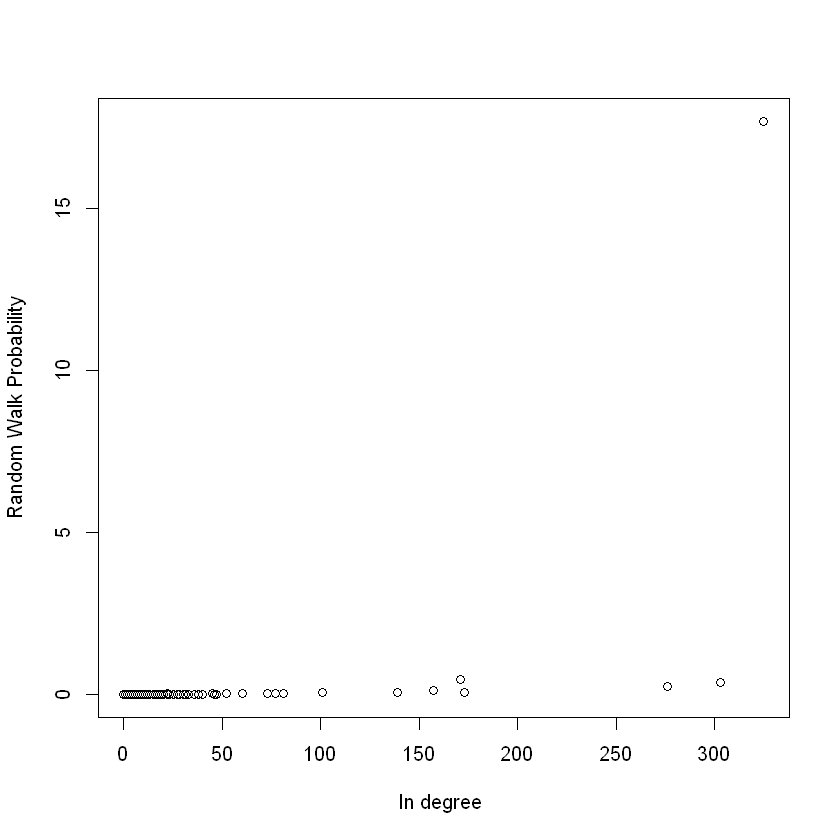

In [31]:
args$page_rank_vector <- rep(0, n)
args$num_steps <- 20
page_rank_scores <- my_page_rank(args)

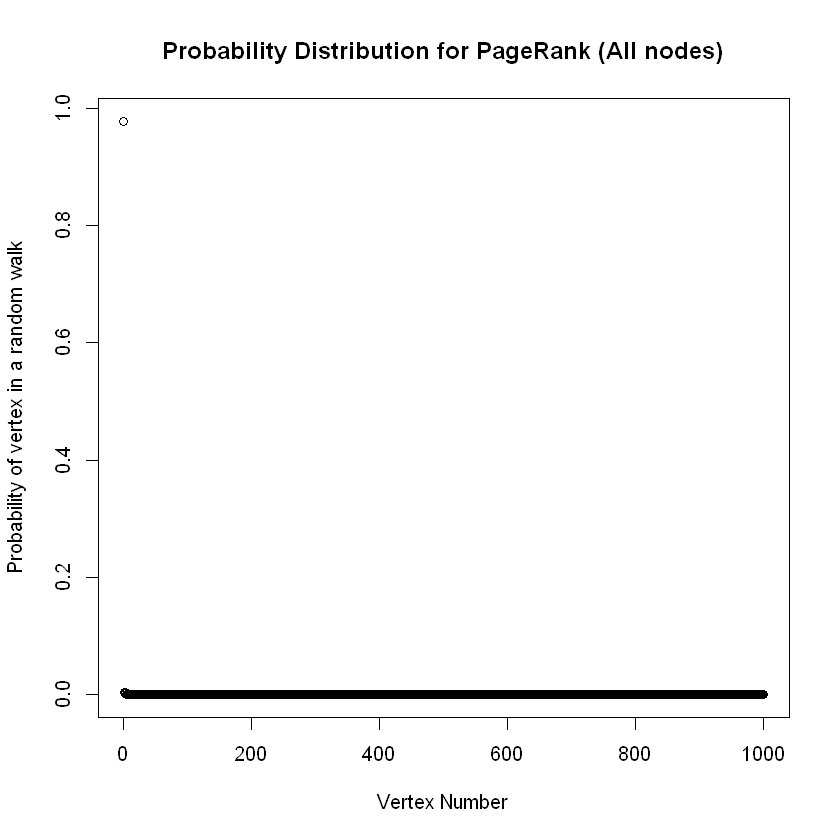

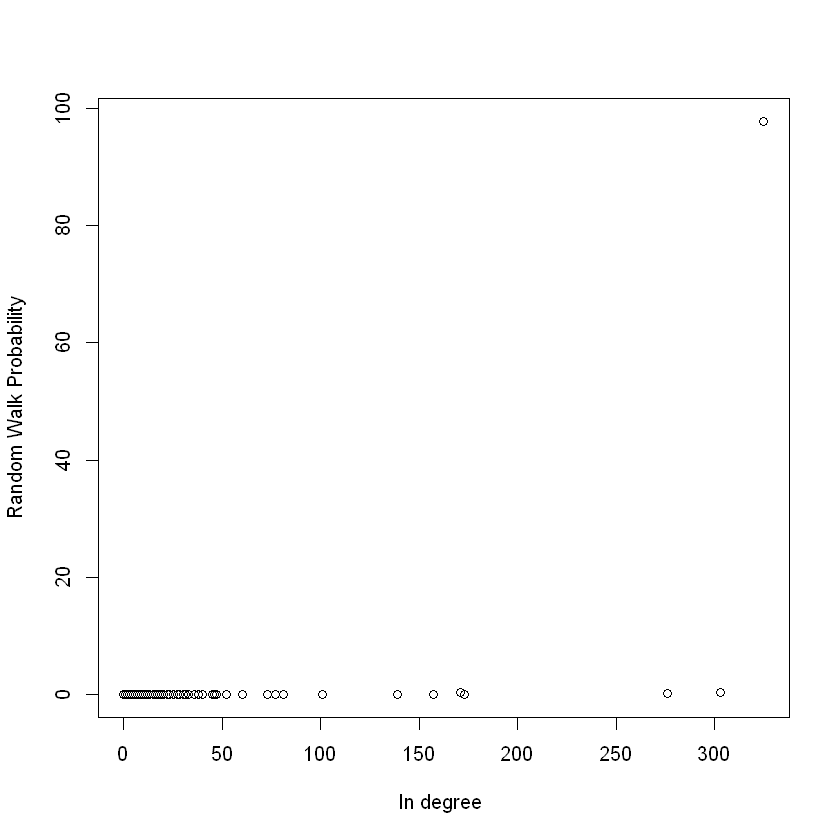

In [32]:
args$page_rank_vector <- rep(0, n)
args$num_steps <- 100
page_rank_scores <- my_page_rank(args)

<h2>Question 3a - Page Rank with only steady state nodes</h2>

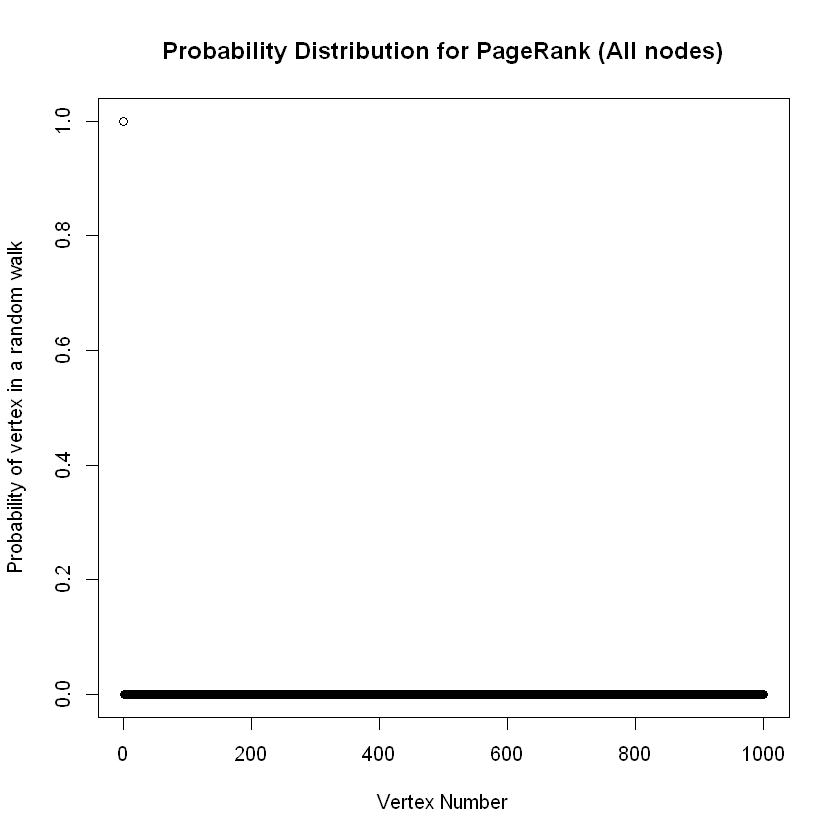

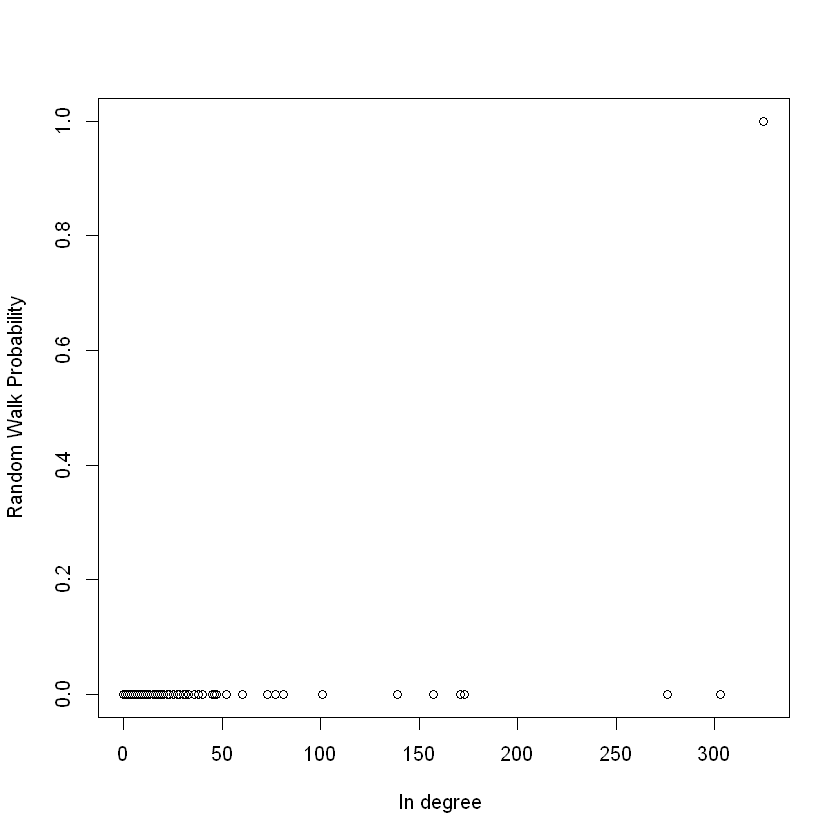

In [33]:
args$page_rank_vector <- rep(0, n)
args$num_steps <- 10
args$steady_state <- TRUE
page_rank_scores <- my_page_rank(args)
args$plot_title <- "Probability Distribution for PageRank (steady state nodes)"

<h2>Question 3b - Page Rank with only steady state nodes - With teleportation</h2>

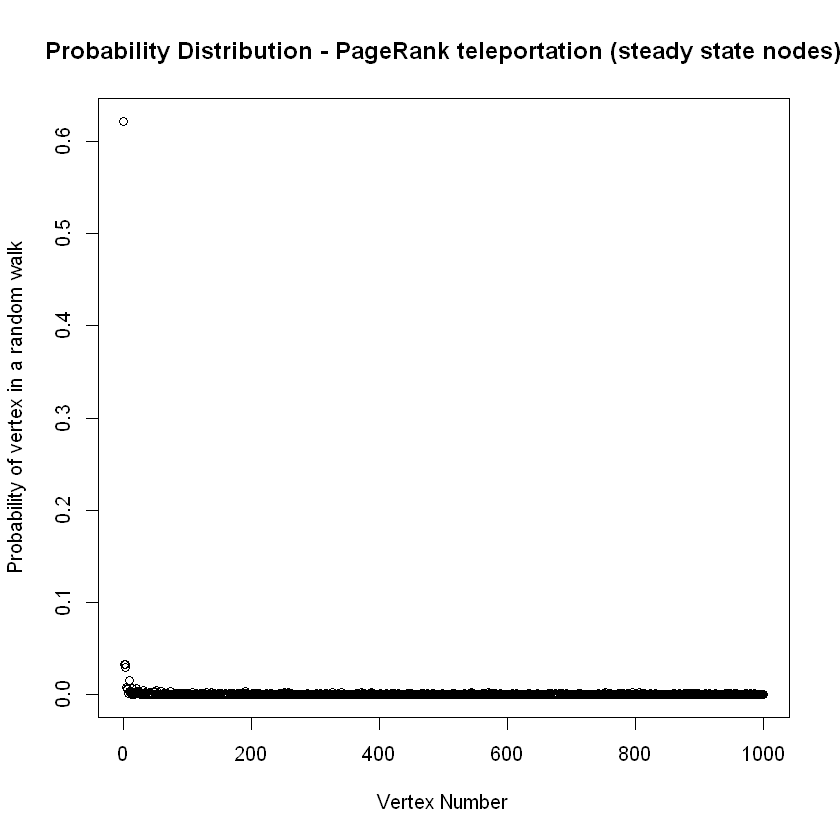

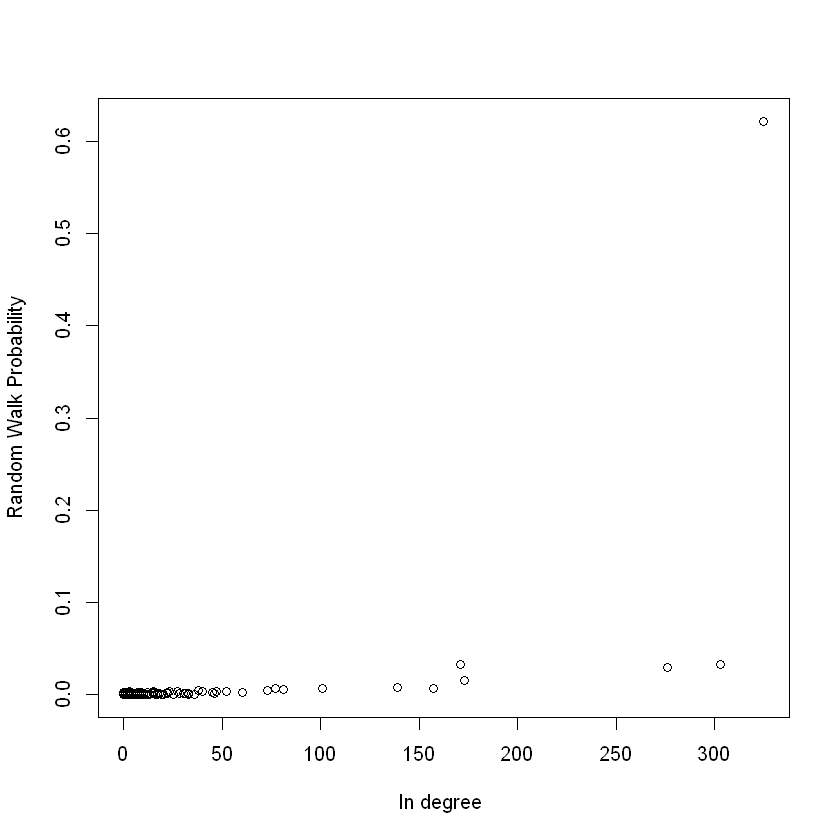

In [34]:
args$pagerank_vector <- rep(0, n)
args$teleport_prob <- 0.15
args$teleport_pmf <- rep(1/n, n)
args$plot_title <- "Probability Distribution - PageRank teleportation (steady state nodes)"
teleport_pagerank_scores <- my_page_rank(args)

<h2>Question 4a - Personalized Page Rank with only steady state nodes - With teleportation</h2>

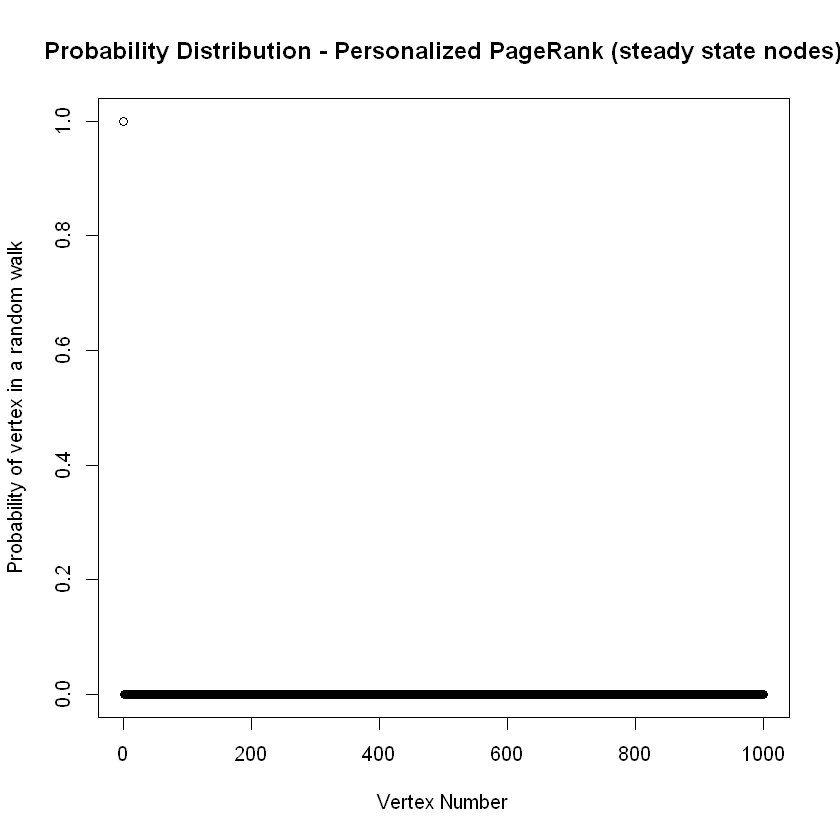

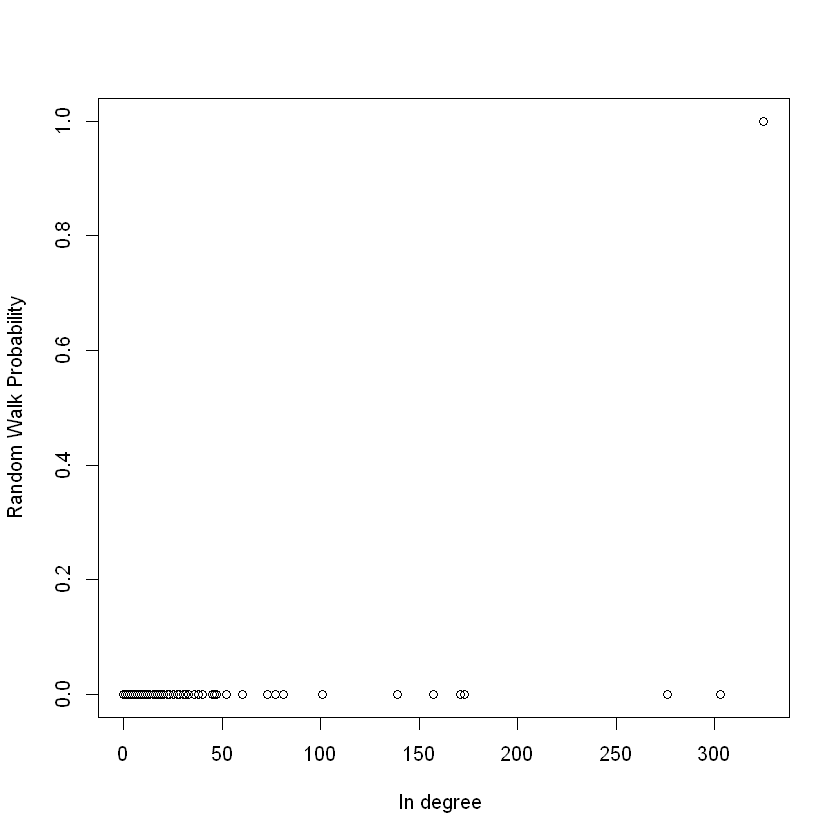

In [35]:
args$pagerank_vector <- rep(0, n)
args$teleport_pmf <- page_rank_scores
args$plot_title <- "Probability Distribution - Personalized PageRank (steady state nodes)"
personalized_page_rank_scores <- my_page_rank(args)

<h2>Question 4b - Personalized Page Rank with Median teleportation with steady state nodes</h2>

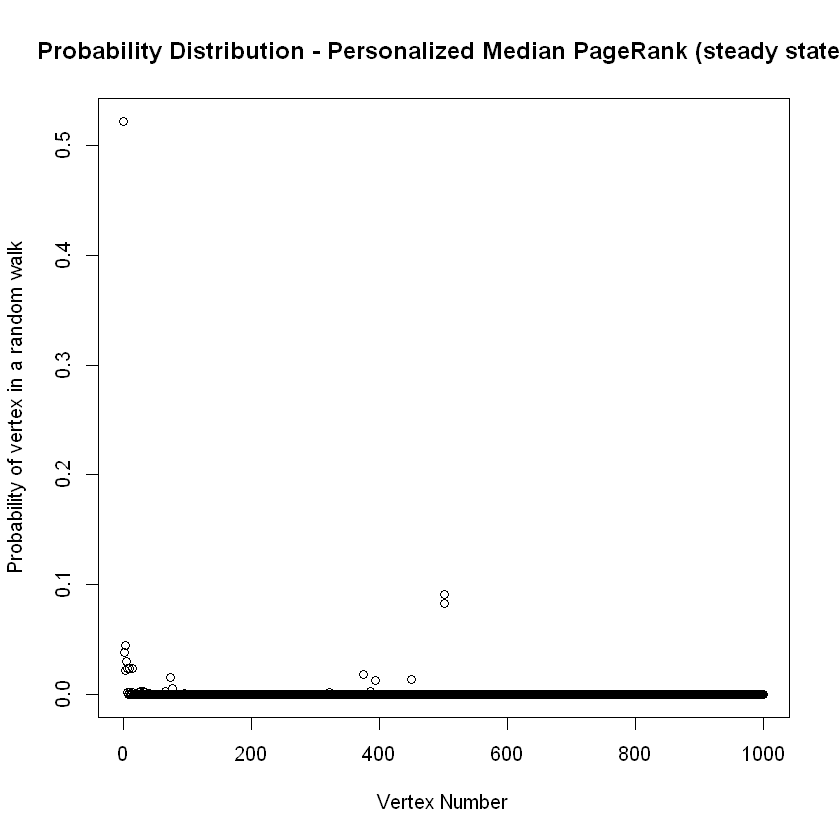

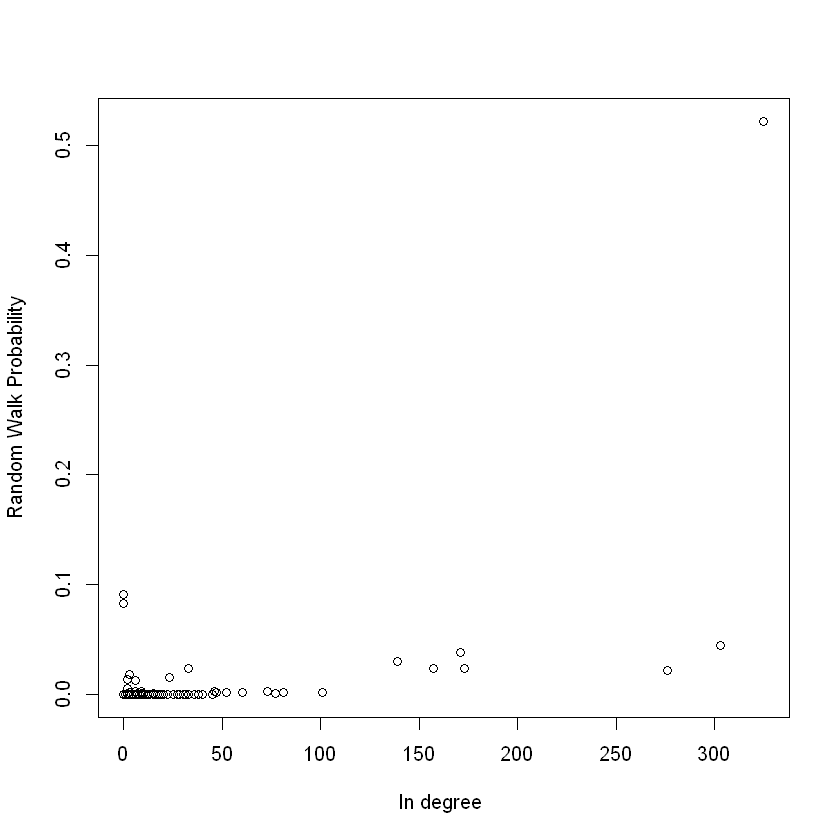

In [37]:
pagerank_pmf_ordered <- order(personalized_page_rank_scores)
median1 <- pagerank_pmf_ordered[n/2]
median2 <- pagerank_pmf_ordered[n/2 + 1]

median_pagerank_pmf <- rep(0, n)

median_pagerank_pmf[median1] <- 0.5
median_pagerank_pmf[median2] <- 0.5

args$pagerank_vector <- rep(0, n)
args$teleport_pmf <- median_pagerank_pmf
args$plot_title <- "Probability Distribution - Personalized Median PageRank (steady state)"

median_page_rank_scores <- my_page_rank(args)

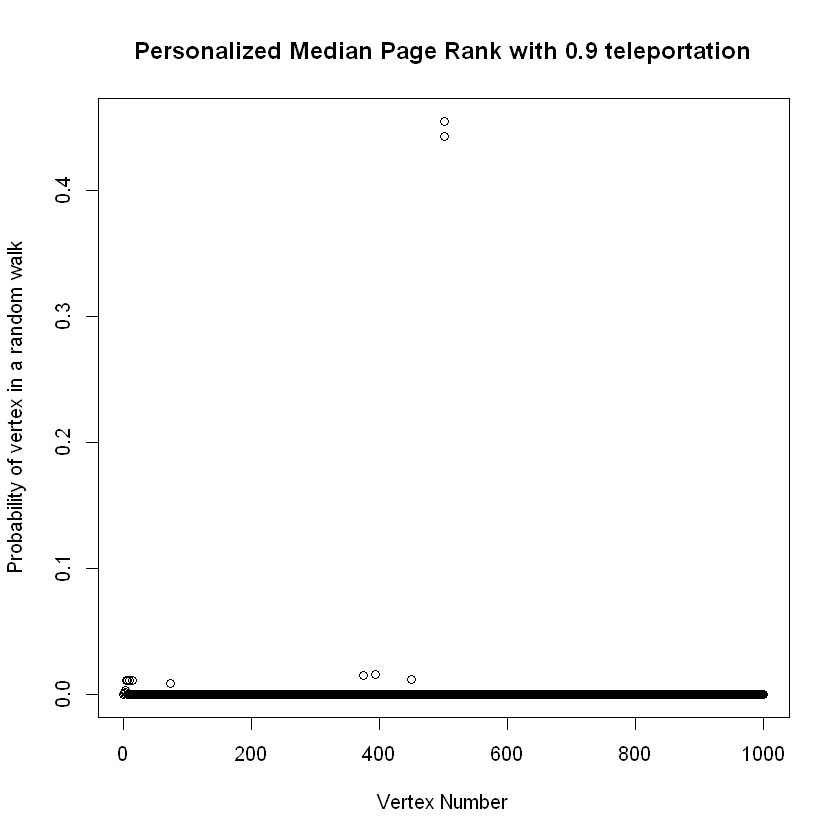

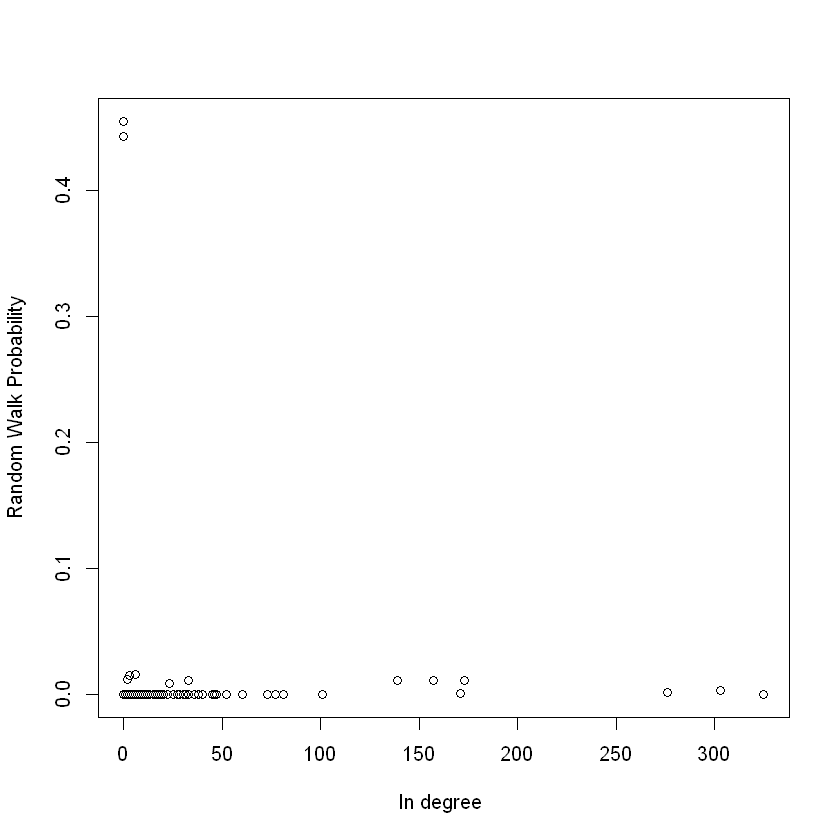

In [38]:
args$pagerank_vector <- rep(0, n)
args$teleport_pmf <- median_pagerank_pmf
args$teleport_prob <- 0.9
args$plot_title <- "Personalized Median Page Rank with 0.9 teleportation"
personalized_page_rank_scores <- my_page_rank(args)

<h2>Analysis of in-built Page Rank with damping very close to 1</h2>

Warning message in page_rank_old(graph, vids = V(graph), damping = 0.9999999999, :
"At structural_properties.c:1379 :igraph_pagerank_old is deprecated from igraph 0.7, use igraph_pagerank instead"

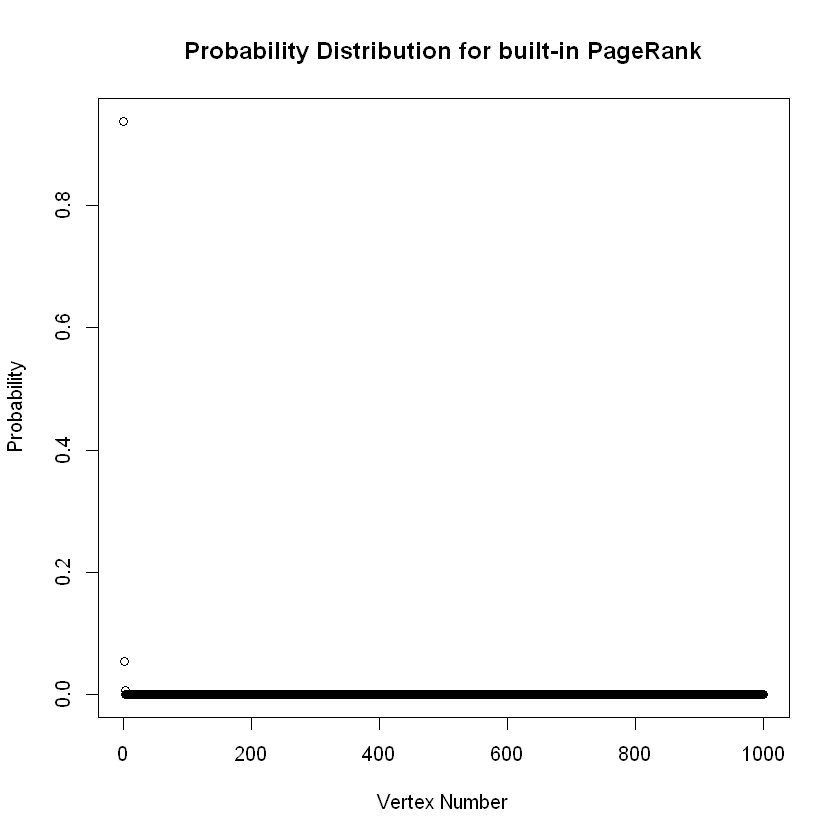

In [39]:
pagerank_scores <- page_rank_old(graph, vids = V(graph), damping = 0.9999999999, eps = 1e-5)
plot(c(pagerank_scores), xlab = "Vertex Number", ylab = "Probability", main = "Probability Distribution for built-in PageRank")

<h2>Analysis of in-built Page Rank with damping 0.85</h2>

Warning message in page_rank_old(graph, vids = V(graph), damping = 0.85):
"At structural_properties.c:1379 :igraph_pagerank_old is deprecated from igraph 0.7, use igraph_pagerank instead"

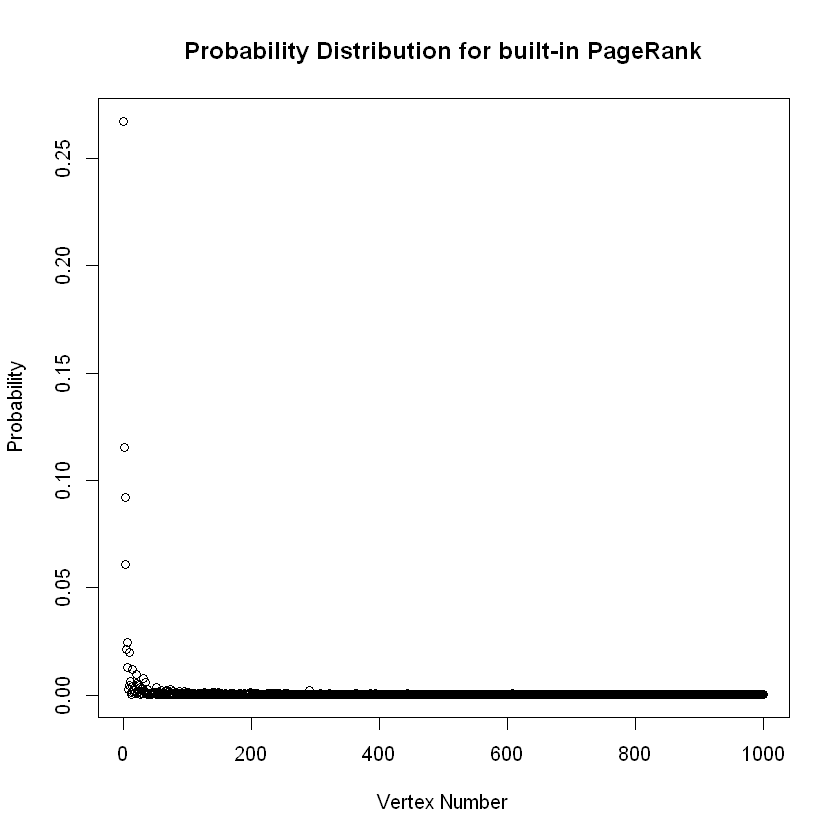

In [40]:
pagerank_scores <- page_rank_old(graph, vids = V(graph), damping = 0.85)
plot(c(pagerank_scores), xlab = "Vertex Number", ylab = "Probability", main = "Probability Distribution for built-in PageRank")